In [20]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_percentage_error

In [21]:
df = pd.read_csv('datasets/Total_consumption_for_all_sectors_monthly.csv', parse_dates=['Month'], date_format='%Y-%m')
df.dropna(inplace=True)
df.head()
df.set_index("Month", inplace=True)
df.index = pd.to_datetime(df.index)
series = pd.Series(df['United States : coal thousand tons'])
series = series[::-1]

C:\Users\mwdzi\AppData\Local\Temp\ipykernel_12092\587574953.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.index = pd.to_datetime(df.index)


Month
2000-12-01    90950.508
2001-01-01    77545.158
2001-02-01    80268.061
2001-03-01    72530.370
2001-04-01    78810.185
Name: United States : coal thousand tons, dtype: float64

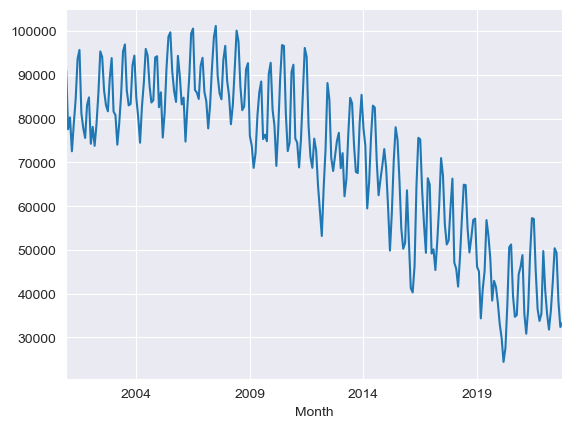

In [22]:
series.plot()
series.head()

In [23]:
train, test = series[:-12], series[-12:]

C:\Users\mwdzi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mwdzi\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


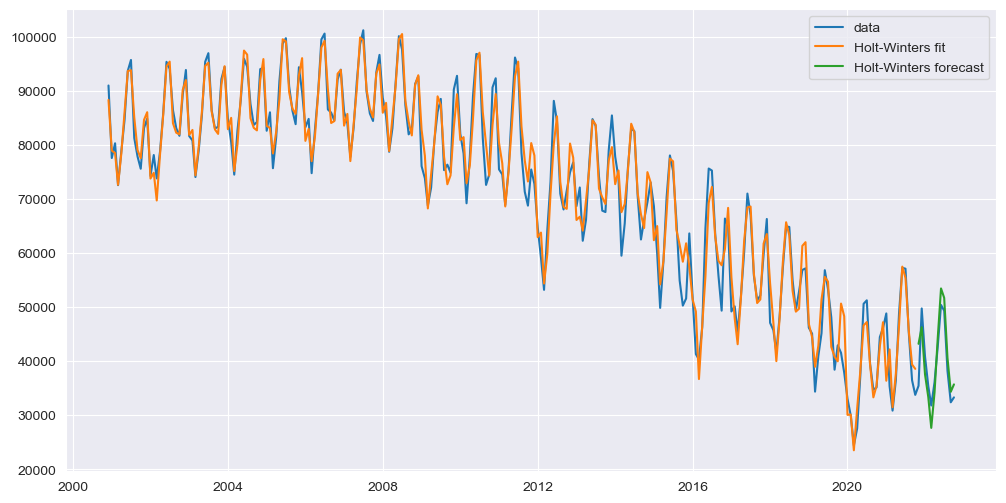

In [24]:
hw_model = ExponentialSmoothing(train, seasonal='add', seasonal_periods=12, trend='add')
hw_model_fit = hw_model.fit()
hw_predictions = hw_model_fit.predict(start=len(train), end=len(train) + len(test) - 1)

plt.figure(figsize=(12, 6))
plt.plot(series.index, series, label='data')
plt.plot(series.index[:len(train)], hw_model_fit.fittedvalues, label='Holt-Winters fit')
plt.plot(series.index[len(train):], hw_predictions, label='Holt-Winters forecast')

plt.legend()
plt.show()

In [25]:
print(hw_model_fit.summary())

                              ExponentialSmoothing Model Results                              
Dep. Variable:     United States : coal thousand tons   No. Observations:                  251
Model:                           ExponentialSmoothing   SSE                     2748316662.923
Optimized:                                       True   AIC                           4100.409
Trend:                                       Additive   BIC                           4156.816
Seasonal:                                    Additive   AICC                          4103.357
Seasonal Periods:                                  12   Date:                 Sun, 05 May 2024
Box-Cox:                                        False   Time:                         18:08:32
Box-Cox Coeff.:                                  None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------

In [26]:
sarima_model = auto_arima(train, seasonal=True, m=12, trace=True)
sarima_model_fit = sarima_model.fit(train)
sarima_predictions = sarima_model_fit.predict(n_periods=len(test))

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.97 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=5190.319, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=5075.040, Time=0.13 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=5102.932, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=5188.539, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=5188.999, Time=0.06 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=5060.599, Time=0.28 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=5030.166, Time=0.98 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=5008.282, Time=0.58 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=5114.356, Time=0.09 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=5034.128, Time=1.30 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=5089.586, Time=0.25 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=1.66 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept

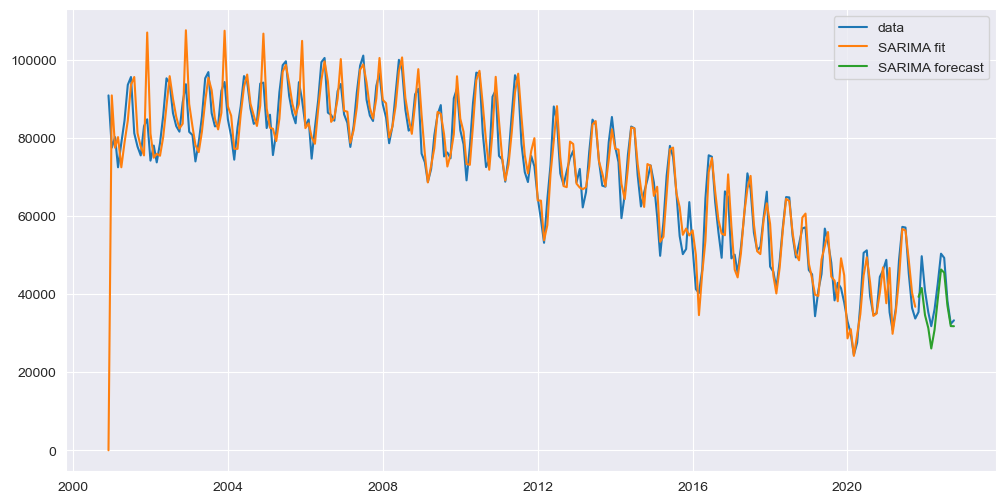

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(series.index, series, label='data')
fitted_values = sarima_model_fit.predict_in_sample()
plt.plot(series.index[:len(fitted_values)], fitted_values, label='SARIMA fit')
plt.plot(test.index, sarima_predictions, label='SARIMA forecast')
plt.legend()
plt.show()

In [29]:
hw_mean_absolute_percentage_error = mean_absolute_percentage_error(test, hw_predictions)
sarima_mean_absolute_percentage_error = mean_absolute_percentage_error(test, sarima_predictions)

print(f'Holt-Winters MAPE: {hw_mean_absolute_percentage_error}')
print(f'SARIMA MAPE: {sarima_mean_absolute_percentage_error}')

Holt-Winters MAPE: 0.07925578727234674
SARIMA MAPE: 0.10087382574012849


The holt-winter model outperforms the SARIMA model in this case, the MAPE for the Holt-Winters model is smaller that for the SARIMA model. 